In [87]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Экспоненциальное распределение
### Для начала построим график экспоненциального распределения. Задаем коэффициент $lambda_$ для нашего распределения. Матожидание и дисперсия экспоненциального распределения (из википедии) равны соответственно $1/lambda_$ и $1/lambda_^2$

/home/artem/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


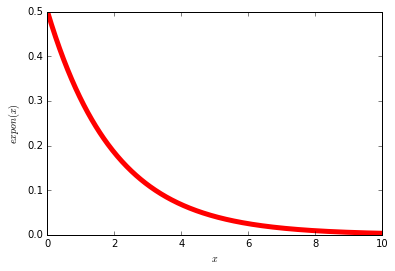

In [88]:
x = np.linspace(0, 10, 500)
lambda_ = 0.5
pdf = sts.expon.pdf(x, scale=1./lambda_)
plt.plot(x, pdf, '-r', lw=5)
plt.ylabel('$expon(x)$')
plt.xlabel('$x$')

### Далее делаем выборку объема 1000 и рисуем поверх ее график нашего распределения

/home/artem/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


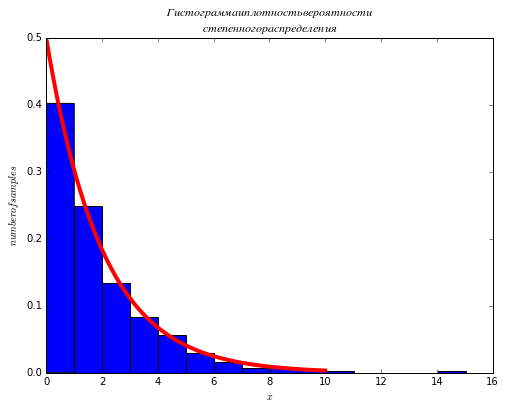

In [89]:
expon_rv = sts.expon(scale = 1./lambda_)
sample = expon_rv.rvs(1000)
plt.figure(figsize=(8, 6))
plt.hist(sample, bins=15,normed=True)
plt.plot(x, pdf, '-r', lw=4)
plt.ylabel('$number of samples$')
plt.xlabel('$x$')
plt.title('$Гистограмма и плотность вероятности$\n$степенного распределения$')

## Считаем дисперсию и мат.ожидание нашего распределения

In [90]:
expon_variance = lambda_ ** (-2)
expon_expected_value = lambda_ ** (-1)
## https://en.wikipedia.org/wiki/Exponential_distribution

## Делаем 1000 выборок объема 5, считаем выборочное среднее и строим гистограмму распределения выборочного среднего. По центральной предельной теореме мы сможем саппроксимировать эту гистограмму нормальным распределением с параметрами mu = E(X) и sigma^2 = D(X) / n , где n - объем выборки. В данном случае n = 5

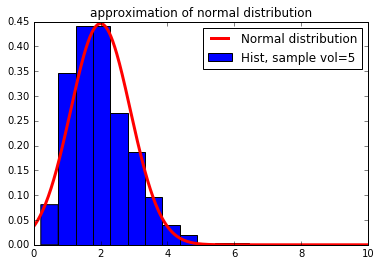

In [91]:
array_st = np.zeros(1000)
for i in range(1000):
     array_st[i] = np.average(expon_rv.rvs(5))
plt.hist(array_st, bins=12, normed=True, label="Hist, sample vol=5")
norm_rv = sts.norm(loc=expon_expected_value, scale=m.sqrt(expon_variance / 5))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, '-r', lw=3, label="Normal distribution")
plt.legend()
plt.title("approximation of normal distribution")

## Аналогично. 1000 выборок объема 10 ( n = 10 )

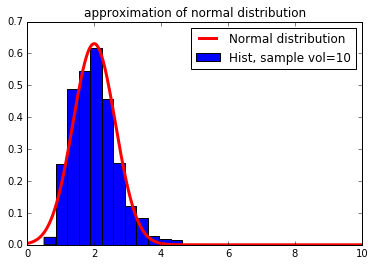

In [92]:
array_st = np.zeros(1000)
for i in range(1000):
     array_st[i] = np.average(expon_rv.rvs(10))
plt.hist(array_st, bins=12, normed=True, label="Hist, sample vol=10")
norm_rv = sts.norm(loc=expon_expected_value, scale=m.sqrt(expon_variance/10))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, '-r', lw=3, label="Normal distribution")
plt.legend()
plt.title("approximation of normal distribution")

## Аналогично. 1000 выборок объема 50 ( n = 50 )

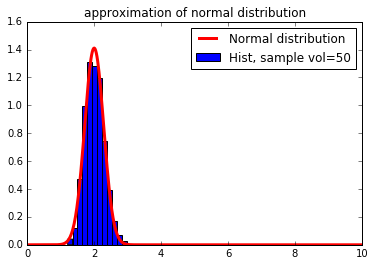

In [93]:
array_st = np.zeros(1000)
for i in range(1000):
     array_st[i] = np.average(expon_rv.rvs(50))
plt.hist(array_st, bins=12, normed=True, label="Hist, sample vol=50")
norm_rv = sts.norm(loc=expon_expected_value, scale=m.sqrt(expon_variance /50))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf,  '-r', lw=3, label="Normal distribution")
plt.legend()
plt.title("approximation of normal distribution")

## Аналогично. 1000 выборок объема 100 ( n = 100 )

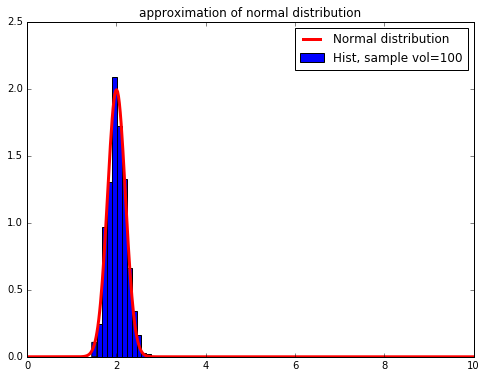

In [94]:
array_st = np.zeros(1000)
for i in range(1000):
     array_st[i] = np.average(expon_rv.rvs(100))
plt.figure(figsize=(8,6))
plt.hist(array_st, bins=12, normed=True, label="Hist, sample vol=100")
norm_rv = sts.norm(loc=expon_expected_value, scale=m.sqrt(expon_variance /100))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf,  '-r', lw=3, label="Normal distribution")
plt.legend()
plt.title("approximation of normal distribution")

# Вывод
##### Мы увидели, что при увеличении числа элементов в подвыборке выборки средние значения этих элементов распределяются все ближе к нормальному распределению. То есть мы на практике проверили справедливость Центральной Предельной Теоремы.